In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
import datetime
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/Users/AntoineDaeniker/Documents/EPFL/Master 1/ML_course/projects/project1/data/train.csv' # TODO: download train data and supply path here 
y, tX, tXt, ids = load_csv_data(DATA_TRAIN_PATH)
print(y.shape, tX.shape)

(250000,) (250000, 30)


## Do your thing crazy machine learning thing here :) ...

In [41]:
new_data = data_process(tX)
feat_keep, feat_throw = feature_selection(new_data, 0.8)
new_data = np.delete(new_data, feat_throw, axis=1)
print(new_data.shape)
#sub_data = subdivide_data(tX)

(250000, 22)


In [9]:
indices = [0, 3, 4, 5, 6, 9, 12, 21, 22, 23, 24, 25, 26, 27]
new_data = np.delete(tX, indices, axis=1)
print(new_data.shape)

(250000, 16)


In [10]:
norm_data,_ = normalize_data(new_data)

In [16]:
max_iters = 1000
gamma = 1*10**(-3)
batch_size = 32

# Initialization
#w_initial = np.random.rand(new_data.shape[1])
w_initial = np.zeros(new_data.shape[1])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, norm_data, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("\nSGD: execution time={t:.3f} seconds, gamma = {gamma}\n".format(t=exection_time, gamma=gamma))

Gradient Descent(999/999): loss=0.43131796580944537, normgrad=0.46014139144980386
SGD: execution time=37.220 seconds, gamma = 0.001



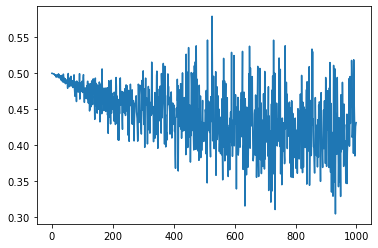

In [17]:
plt.plot(np.arange(max_iters), sgd_losses)

## Generate predictions and save ouput in csv format for submission:

In [18]:
DATA_TEST_PATH = '/Users/AntoineDaeniker/Documents/EPFL/Master 1/ML_course/projects/project1/data/test.csv' # TODO: download train data and supply path here 
y_test, tX_test, tXt_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [19]:
new_data_test = data_process(tX_test)
feat_keep_test, feat_throw_test = feature_selection(new_data_test, 0.8)
new_data_test = np.delete(new_data_test, feat_throw_test, axis=1)

NameError: name 'data_process' is not defined

In [52]:
sgd_ws

array([-2.54507088e-01, -2.24558817e-01,  1.06183714e-01, -6.93311320e-03,
        2.55179040e-01, -2.71300621e-02, -1.53581929e-01,  1.34616716e-01,
        9.97439158e-02,  1.83517214e-01, -1.01592829e-03, -1.10120696e-03,
        2.43265124e-01, -7.88457854e-05,  2.71564473e-03,  9.78442656e-02,
        1.03914326e-03,  3.28561169e-04,  1.03127349e-04,  1.30377929e-03,
       -1.50488235e-03, -1.32355497e-01])

In [53]:
pred_train = predict_labels(sgd_ws, new_data)
len(pred_train[abs(pred_train-y) == 0]) * 100 / len(y)

71.9756

In [54]:
pred_test = predict_labels(sgd_ws, new_data_test)
len(pred_test[abs(pred_test-y_test) == 0]) * 100 / len(y_test)

49.02892801959742

In [196]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'weights' is not defined